In [54]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import numpy as np
from torch.utils.data import Dataset
import pandas as pd
from tqdm import tqdm
import torch.backends.cudnn as cudnn
import random
import numpy as np
from matplotlib import pyplot as plt
seed = 1443
cudnn.benchmark = False
cudnn.deterministic = True
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)


In [55]:
batch_size = 256
learning_rate = 0.01
epoches = 100



In [56]:
class Data(Dataset):
    def __init__(self, csv_file, transform=None):

        super(Data, self).__init__()
        file = pd.read_csv(csv_file)
        self.input_data = file[['x1', 'x2']].values
        self.labels = file['y'].values.astype(int)   
          
    def __getitem__(self, index):
        data_item = self.input_data[index]
        data_item = torch.tensor(data_item).float()

        label = self.labels[index]
        return data_item, label

    def __len__(self):
        return len(self.input_data)

In [57]:
train_data = Data('train_q4.csv')
test_data = Data('test_q4.csv')
train_dataloader = DataLoader(train_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

In [58]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
           nn.Linear(2,4),
           nn.ReLU(),
           nn.Linear(4,4),
           nn.ReLU(),
           nn.Linear(4,3),
        )
        self.initialize_weights()

        
    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits
    
    def initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_normal_(m.weight)
                if m.bias is not None:
                     nn.init.zeros_(m.bias)  

In [59]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = NeuralNetwork().to(device)

In [60]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

  1%|          | 1/100 [00:00<00:31,  3.10it/s]

 Train accuracy: 48.8%, Avg loss: 0.910696


  2%|▏         | 2/100 [00:00<00:25,  3.79it/s]

 Train accuracy: 53.0%, Avg loss: 0.789355


  3%|▎         | 3/100 [00:00<00:23,  4.07it/s]

 Train accuracy: 60.4%, Avg loss: 0.739636


  4%|▍         | 4/100 [00:00<00:22,  4.23it/s]

 Train accuracy: 71.2%, Avg loss: 0.704557


  5%|▌         | 5/100 [00:01<00:21,  4.32it/s]

 Train accuracy: 75.3%, Avg loss: 0.675095


  6%|▌         | 6/100 [00:01<00:22,  4.18it/s]

 Train accuracy: 78.3%, Avg loss: 0.649126


  7%|▋         | 7/100 [00:01<00:21,  4.24it/s]

 Train accuracy: 80.2%, Avg loss: 0.625747


  8%|▊         | 8/100 [00:01<00:22,  4.05it/s]

 Train accuracy: 81.5%, Avg loss: 0.604507


  9%|▉         | 9/100 [00:02<00:22,  4.13it/s]

 Train accuracy: 82.5%, Avg loss: 0.585390


 10%|█         | 10/100 [00:02<00:20,  4.31it/s]

 Train accuracy: 83.3%, Avg loss: 0.568187
 Train accuracy: 83.8%, Avg loss: 0.552613


 12%|█▏        | 12/100 [00:02<00:20,  4.37it/s]

 Train accuracy: 84.2%, Avg loss: 0.538438
 Train accuracy: 84.8%, Avg loss: 0.525480


 15%|█▌        | 15/100 [00:03<00:18,  4.65it/s]

 Train accuracy: 85.1%, Avg loss: 0.513588
 Train accuracy: 85.5%, Avg loss: 0.502780


 16%|█▌        | 16/100 [00:03<00:17,  4.72it/s]

 Train accuracy: 85.8%, Avg loss: 0.492933


 17%|█▋        | 17/100 [00:03<00:18,  4.50it/s]

 Train accuracy: 86.1%, Avg loss: 0.483794


 19%|█▉        | 19/100 [00:04<00:17,  4.68it/s]

 Train accuracy: 86.3%, Avg loss: 0.475252
 Train accuracy: 86.4%, Avg loss: 0.467226


 21%|██        | 21/100 [00:04<00:16,  4.68it/s]

 Train accuracy: 86.6%, Avg loss: 0.459632
 Train accuracy: 86.7%, Avg loss: 0.452419


 23%|██▎       | 23/100 [00:05<00:16,  4.73it/s]

 Train accuracy: 86.8%, Avg loss: 0.445800
 Train accuracy: 87.0%, Avg loss: 0.439717


 24%|██▍       | 24/100 [00:05<00:16,  4.67it/s]

 Train accuracy: 87.0%, Avg loss: 0.434106


 26%|██▌       | 26/100 [00:05<00:15,  4.78it/s]

 Train accuracy: 87.1%, Avg loss: 0.428845
 Train accuracy: 87.2%, Avg loss: 0.423831


 27%|██▋       | 27/100 [00:06<00:15,  4.75it/s]

 Train accuracy: 87.3%, Avg loss: 0.418990


 28%|██▊       | 28/100 [00:06<00:15,  4.68it/s]

 Train accuracy: 87.3%, Avg loss: 0.414249
 Train accuracy: 87.4%, Avg loss: 0.409573


 31%|███       | 31/100 [00:06<00:14,  4.87it/s]

 Train accuracy: 87.5%, Avg loss: 0.404940
 Train accuracy: 87.6%, Avg loss: 0.400323


 32%|███▏      | 32/100 [00:07<00:14,  4.78it/s]

 Train accuracy: 87.7%, Avg loss: 0.395695
 Train accuracy: 87.7%, Avg loss: 0.391034


 34%|███▍      | 34/100 [00:07<00:13,  4.84it/s]

 Train accuracy: 87.8%, Avg loss: 0.386319
 Train accuracy: 88.0%, Avg loss: 0.381519


 37%|███▋      | 37/100 [00:08<00:13,  4.67it/s]

 Train accuracy: 88.3%, Avg loss: 0.376622
 Train accuracy: 88.6%, Avg loss: 0.371630


 38%|███▊      | 38/100 [00:08<00:13,  4.75it/s]

 Train accuracy: 89.0%, Avg loss: 0.366528
 Train accuracy: 89.3%, Avg loss: 0.361307


 40%|████      | 40/100 [00:08<00:12,  4.86it/s]

 Train accuracy: 89.6%, Avg loss: 0.355956


 41%|████      | 41/100 [00:08<00:12,  4.69it/s]

 Train accuracy: 90.1%, Avg loss: 0.350480


 42%|████▏     | 42/100 [00:09<00:12,  4.71it/s]

 Train accuracy: 90.6%, Avg loss: 0.344878


 43%|████▎     | 43/100 [00:09<00:12,  4.68it/s]

 Train accuracy: 91.1%, Avg loss: 0.339163


 44%|████▍     | 44/100 [00:09<00:11,  4.72it/s]

 Train accuracy: 91.6%, Avg loss: 0.333345
 Train accuracy: 92.1%, Avg loss: 0.327428


 46%|████▌     | 46/100 [00:10<00:11,  4.82it/s]

 Train accuracy: 92.5%, Avg loss: 0.321434
 Train accuracy: 92.9%, Avg loss: 0.315384


 48%|████▊     | 48/100 [00:10<00:10,  4.81it/s]

 Train accuracy: 93.3%, Avg loss: 0.309289


 49%|████▉     | 49/100 [00:10<00:10,  4.64it/s]

 Train accuracy: 93.7%, Avg loss: 0.303177


 50%|█████     | 50/100 [00:10<00:10,  4.63it/s]

 Train accuracy: 94.1%, Avg loss: 0.297077


 51%|█████     | 51/100 [00:11<00:10,  4.70it/s]

 Train accuracy: 94.3%, Avg loss: 0.291014


 52%|█████▏    | 52/100 [00:11<00:10,  4.65it/s]

 Train accuracy: 94.7%, Avg loss: 0.285023


 53%|█████▎    | 53/100 [00:11<00:10,  4.32it/s]

 Train accuracy: 95.1%, Avg loss: 0.279121


 55%|█████▌    | 55/100 [00:11<00:09,  4.53it/s]

 Train accuracy: 95.2%, Avg loss: 0.273345
 Train accuracy: 95.3%, Avg loss: 0.267704


 56%|█████▌    | 56/100 [00:12<00:09,  4.53it/s]

 Train accuracy: 95.6%, Avg loss: 0.262222


 57%|█████▋    | 57/100 [00:12<00:09,  4.59it/s]

 Train accuracy: 95.6%, Avg loss: 0.256916


 59%|█████▉    | 59/100 [00:12<00:08,  4.66it/s]

 Train accuracy: 95.7%, Avg loss: 0.251793
 Train accuracy: 95.8%, Avg loss: 0.246862


 60%|██████    | 60/100 [00:13<00:08,  4.69it/s]

 Train accuracy: 95.8%, Avg loss: 0.242127


 61%|██████    | 61/100 [00:13<00:08,  4.67it/s]

 Train accuracy: 95.9%, Avg loss: 0.237598


 62%|██████▏   | 62/100 [00:13<00:08,  4.68it/s]

 Train accuracy: 95.8%, Avg loss: 0.233257


 63%|██████▎   | 63/100 [00:13<00:07,  4.68it/s]

 Train accuracy: 95.9%, Avg loss: 0.229112
 Train accuracy: 95.9%, Avg loss: 0.225156


 65%|██████▌   | 65/100 [00:14<00:07,  4.54it/s]

 Train accuracy: 96.0%, Avg loss: 0.221382


 66%|██████▌   | 66/100 [00:14<00:07,  4.62it/s]

 Train accuracy: 96.0%, Avg loss: 0.217783


 67%|██████▋   | 67/100 [00:14<00:07,  4.60it/s]

 Train accuracy: 96.0%, Avg loss: 0.214350


 68%|██████▊   | 68/100 [00:14<00:07,  4.54it/s]

 Train accuracy: 96.0%, Avg loss: 0.211073
 Train accuracy: 96.0%, Avg loss: 0.207946


 70%|███████   | 70/100 [00:15<00:06,  4.73it/s]

 Train accuracy: 96.0%, Avg loss: 0.204961


 71%|███████   | 71/100 [00:15<00:06,  4.58it/s]

 Train accuracy: 96.1%, Avg loss: 0.202104


 72%|███████▏  | 72/100 [00:15<00:06,  4.65it/s]

 Train accuracy: 96.1%, Avg loss: 0.199373


 73%|███████▎  | 73/100 [00:15<00:05,  4.70it/s]

 Train accuracy: 96.1%, Avg loss: 0.196775


 74%|███████▍  | 74/100 [00:16<00:05,  4.69it/s]

 Train accuracy: 96.1%, Avg loss: 0.194304
 Train accuracy: 96.2%, Avg loss: 0.191938


 76%|███████▌  | 76/100 [00:16<00:04,  4.80it/s]

 Train accuracy: 96.2%, Avg loss: 0.189668
 Train accuracy: 96.2%, Avg loss: 0.187489


 79%|███████▉  | 79/100 [00:17<00:04,  4.78it/s]

 Train accuracy: 96.2%, Avg loss: 0.185394
 Train accuracy: 96.2%, Avg loss: 0.183377


 80%|████████  | 80/100 [00:17<00:04,  4.80it/s]

 Train accuracy: 96.2%, Avg loss: 0.181435


 81%|████████  | 81/100 [00:17<00:03,  4.83it/s]

 Train accuracy: 96.2%, Avg loss: 0.179563
 Train accuracy: 96.2%, Avg loss: 0.177758


 83%|████████▎ | 83/100 [00:17<00:03,  4.87it/s]

 Train accuracy: 96.3%, Avg loss: 0.176015


 84%|████████▍ | 84/100 [00:18<00:03,  4.86it/s]

 Train accuracy: 96.3%, Avg loss: 0.174330


 85%|████████▌ | 85/100 [00:18<00:03,  4.80it/s]

 Train accuracy: 96.3%, Avg loss: 0.172700


 86%|████████▌ | 86/100 [00:18<00:03,  4.43it/s]

 Train accuracy: 96.3%, Avg loss: 0.171122
 Train accuracy: 96.3%, Avg loss: 0.169593


 89%|████████▉ | 89/100 [00:19<00:02,  4.74it/s]

 Train accuracy: 96.4%, Avg loss: 0.168112
 Train accuracy: 96.4%, Avg loss: 0.166674


 90%|█████████ | 90/100 [00:19<00:02,  4.64it/s]

 Train accuracy: 96.4%, Avg loss: 0.165278
 Train accuracy: 96.4%, Avg loss: 0.163922


 92%|█████████▏| 92/100 [00:19<00:01,  4.55it/s]

 Train accuracy: 96.4%, Avg loss: 0.162604
 Train accuracy: 96.4%, Avg loss: 0.161321


 94%|█████████▍| 94/100 [00:20<00:01,  4.69it/s]

 Train accuracy: 96.4%, Avg loss: 0.160072


 95%|█████████▌| 95/100 [00:20<00:01,  4.61it/s]

 Train accuracy: 96.5%, Avg loss: 0.158855


 96%|█████████▌| 96/100 [00:20<00:00,  4.65it/s]

 Train accuracy: 96.5%, Avg loss: 0.157668
 Train accuracy: 96.5%, Avg loss: 0.156509


 99%|█████████▉| 99/100 [00:21<00:00,  4.74it/s]

 Train accuracy: 96.5%, Avg loss: 0.155378
 Train accuracy: 96.6%, Avg loss: 0.154273


100%|██████████| 100/100 [00:21<00:00,  4.63it/s]

 Train accuracy: 96.6%, Avg loss: 0.153192


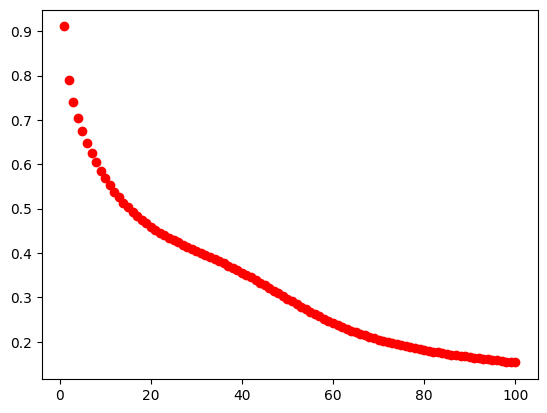

In [61]:
model.train()
epoches_time=0
for epoch in tqdm(range(epoches)):
    epoches_time=epoches_time+1
    train_loss, correct = 0, 0
    for X, y in train_dataloader:
        X, y = X.to(device), y.to(device)

        pred = model(X)

        loss = loss_fn(pred, y.long())

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # record loss
        train_loss += loss.item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    size = len(train_dataloader.dataset)
    train_loss /= len(train_dataloader)
    correct /= size
    print(f" Train accuracy: {(100*correct):>0.1f}%, Avg loss: {train_loss:>8f}")
    plt.plot(epoches_time,train_loss,"ro")
plt.show()


In [62]:
model.eval()
correct = 0
# Turn off gradient descent
with torch.no_grad():
    for X, y in tqdm(test_dataloader):
        X, y = X.to(device), y.to(device)
        pred = model(X)
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()
size = len(test_dataloader.dataset)
correct = correct / size
print(f" Test accuracy: {(100*correct):>0.1f}%")

100%|██████████| 8/8 [00:00<00:00, 142.92it/s]

 Test accuracy: 77.4%
